<a href="https://colab.research.google.com/github/0DianaHernandez/Simulacion-I/blob/main/Inventarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aplicaciones de simulación**

*Simulacion sistema de inventarios*

**Consideraciones:**
El sistema de inventarios que se analiza es *lote constante y tiempo entre pedidos variables*. Las variables de decisión para este modelo son la cantidad a ordenar $q$ y el nivel de reorden $R$, las cuales minimizan los costos totales del inventario (costo de ordenar, costo de llevar inventario y costo de faltante).

**Problema:** Si el inventario inicial se asume en 150 unidades, determine la cantidad óptima a ordenar $(q)$ y el nivel óptimo de reorden $(R)$




In [75]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from tabulate import tabulate

In [77]:
# Datos de entrada
demanda = np.array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])
prob_demanda = np.array([0.010, 0.015, 0.020, 0.020, 0.022, 0.023, 0.025, 0.027, 0.028, 0.029, 0.035, 0.045, 0.060, 0.065, 0.070, 0.080, 0.075, 0.070, 0.065, 0.060, 0.050, 0.040, 0.030, 0.016, 0.015, 0.005])
factores_estacionales = np.array([1.20, 1.00, 0.90, 0.80, 0.80, 0.70, 0.80, 0.90, 1.00, 1.20, 1.30, 1.40])


In [78]:
# Función para simular el inventario y graficar
def simular_inventario_grafico(inventario_inicial, n_meses, punto_reorden):
    inventario = inventario_inicial
    inventario_i = [inventario_inicial]  # Lista para guardar el inventario inicial
    carga_pendiente = False
    tiempo_entrega = 0
    contador_entrega = -1
    faltante = 0
    datos = []

    for mes in range(n_meses):
        # Genera un número aleatorio u
        u = rnd.random()

        # Calcula la demanda ajustada para el mes actual
        demanda_ajustada = demanda[np.random.choice(len(prob_demanda), p=prob_demanda)] * factores_estacionales[mes % 12]
        inv_final = inventario - demanda_ajustada

        # Verifica si se ha pasado del punto de reorden y hay carga pendiente
        if inv_final <= punto_reorden and not carga_pendiente:
            tiempo_entrega = np.random.choice([1, 2, 3], p=[0.30, 0.40, 0.30])
            carga_pendiente = True

        # Gestiona la entrega y ajusta el inventario
        if carga_pendiente:
            contador_entrega += 1

        if inv_final < 0:
            faltante = abs(inv_final)
            datos.append([mes + 1, inventario, u, demanda_ajustada, inv_final, faltante, tiempo_entrega, (inventario + inv_final) / 2])
        else:
            datos.append([mes + 1, inventario, u, demanda_ajustada, inv_final, '-', tiempo_entrega, (inventario + inv_final) / 2])

        inventario = inv_final + np.random.choice([0, 200]) if contador_entrega == tiempo_entrega else inv_final

        # Reinicia las variables después de la entrega
        if contador_entrega == tiempo_entrega:
            contador_entrega = -1
            carga_pendiente = False
            tiempo_entrega = 0
            faltante = 0

        inventario_i.append(inventario)


In [79]:
    # Imprimimos la tabla
    headers = ['Mes', 'Inventario inicial', 'No. aleatorio', 'Demanda ajustada', 'Inventario final', 'Faltante', 'Entrega', 'Inventario mensual promedio']
    print(tabulate(datos, headers=headers, tablefmt="fancy_grid", showindex=False))


╒════╤═══════╤══════════════════════╤═════════════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│    │   Mes │   Inventario inicial │   No. aleatorio │   Demanda ajustada │ Inventario final   │ Faltante   │   Entrega │   Inventario mensual promedio │
╞════╪═══════╪══════════════════════╪═════════════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│  1 │   150 │            0.417941  │              48 │                 58 │ 92                 │ -          │         2 │                         121   │
├────┼───────┼──────────────────────┼─────────────────┼────────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│  2 │    92 │            0.416414  │              48 │                 48 │ 44                 │ -          │         0 │                          68   │
├────┼───────┼──────────────────────┼─────────────────┼───────────────

In [85]:
# Parámetros de simulación
inventario_inicial = 150
n_meses = 12
punto_reorden = 100

# Llamar a la función para simular y graficar
simular_inventario_grafico(inventario_inicial, n_meses, punto_reorden)


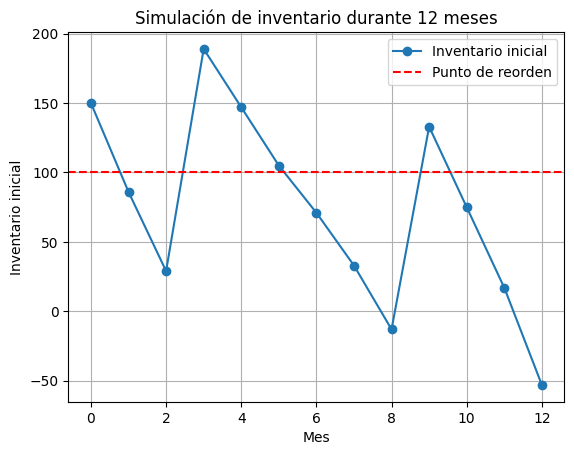

In [86]:
# Gráfico
plt.plot(inventario_i, marker='o', label="Inventario inicial")
plt.title('Simulación de inventario durante 12 meses')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(y=punto_reorden, color='r', linestyle='--', label='Punto de reorden')
plt.grid(True)
plt.legend()
plt.show()